In [1]:
# Machine Learning Library
import pandas as pd
import numpy as np
import pickle
import nltk
import re
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [2]:
# Deep Learning Library
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [5]:
train_data = pd.read_csv("shuffled_data_file.txt", header = None, sep=";", names=["Sl_No","Comment", "Psy_Emotion","Categorical_Emotion"], encoding="utf-8")

In [6]:
train_data.drop(['Sl_No', 'Psy_Emotion'], axis=1, inplace=True)

In [7]:
train_data.head()

Comment Categorical_Emotion
0        Treated myself to a movie night for Rs 500.       Entertainment
1  Invested Rs 3200 in cryptocurrency for potenti...  Financial Services
2  Planned a fun-filled day trip with family, spe...       Entertainment
3                Invested Rs 7980 in cryptocurrency.  Financial Services
4                     Invested Rs 5600 in a startup.  Financial Services

In [8]:
train_data.shape

(1003, 2)

In [9]:
train_data.isnull().sum()

Comment                0
Categorical_Emotion    0
dtype: int64

In [10]:
train_data.duplicated().sum()

131

In [11]:
train_data.drop_duplicates(inplace=True)

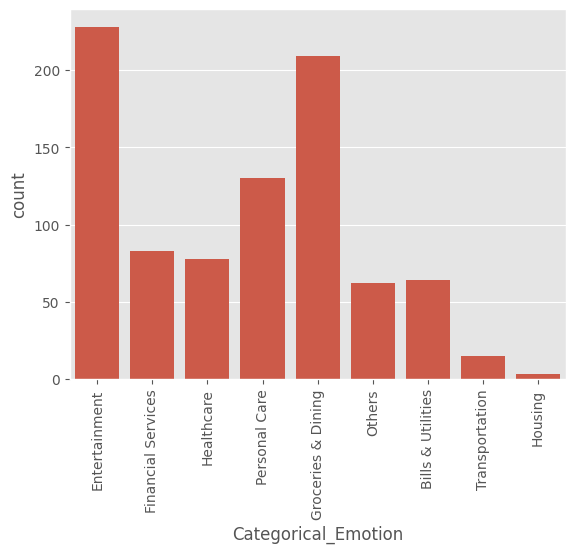

In [13]:
sns.countplot(x = train_data['Categorical_Emotion'])
plt.xticks(rotation=90)
plt.show()

In [14]:
train_data['Categorical_Emotion'].value_counts()

Categorical_Emotion
Entertainment         228
Groceries & Dining    209
Personal Care         130
Financial Services     83
Healthcare             78
Bills & Utilities      64
Others                 62
Transportation         15
Housing                 3
Name: count, dtype: int64

In [15]:
train_data['length'] = [len(x) for x in train_data['Comment']]

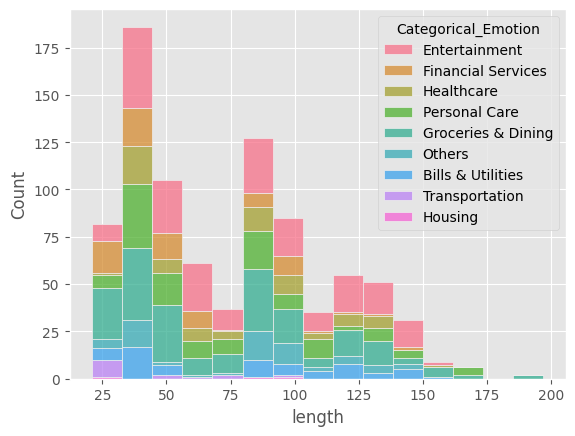

In [16]:
# data distribution
df2 = train_data.copy()
df2['length'] = [len(x) for x in df2['Comment']]

# Convert the 'length' column to a numpy array
length_values = df2['length'].values

# Use sns.histplot instead of sns.kdeplot for simplicity
sns.histplot(data=df2, x='length', hue='Categorical_Emotion', multiple='stack')

plt.show()

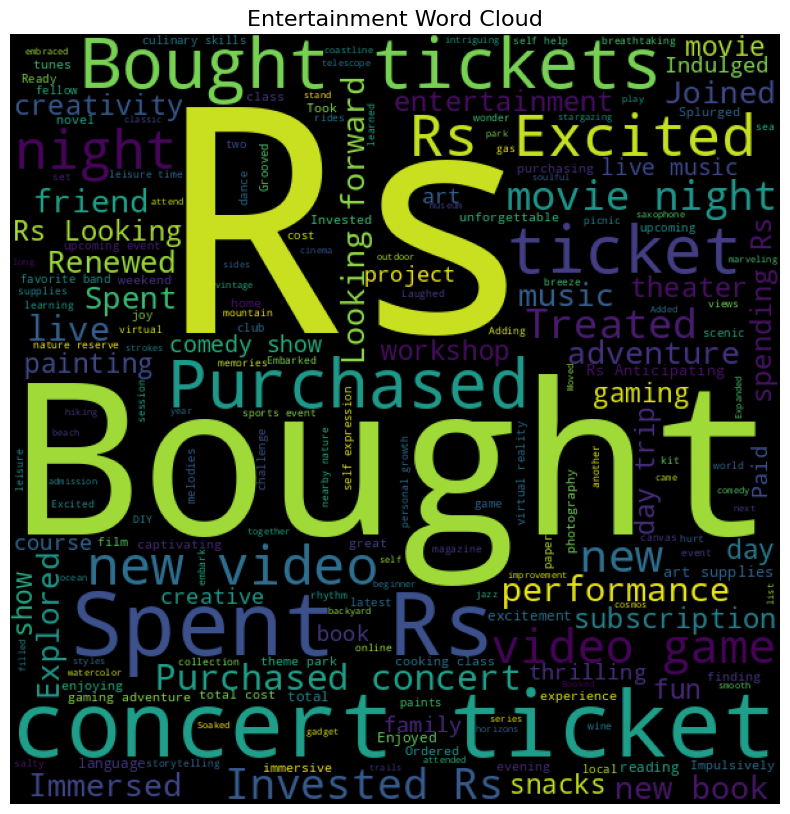

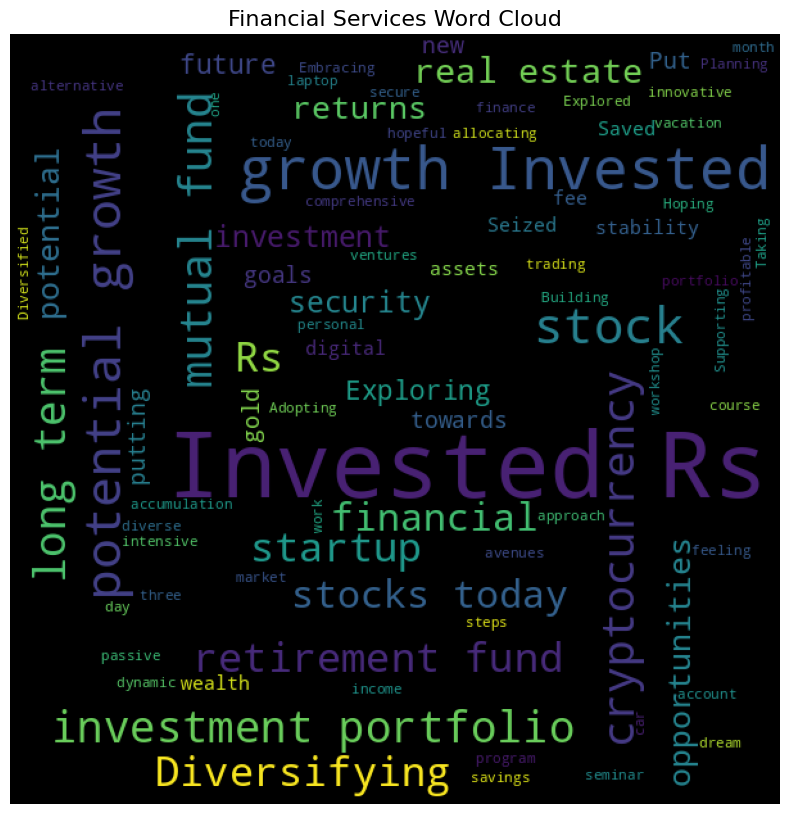

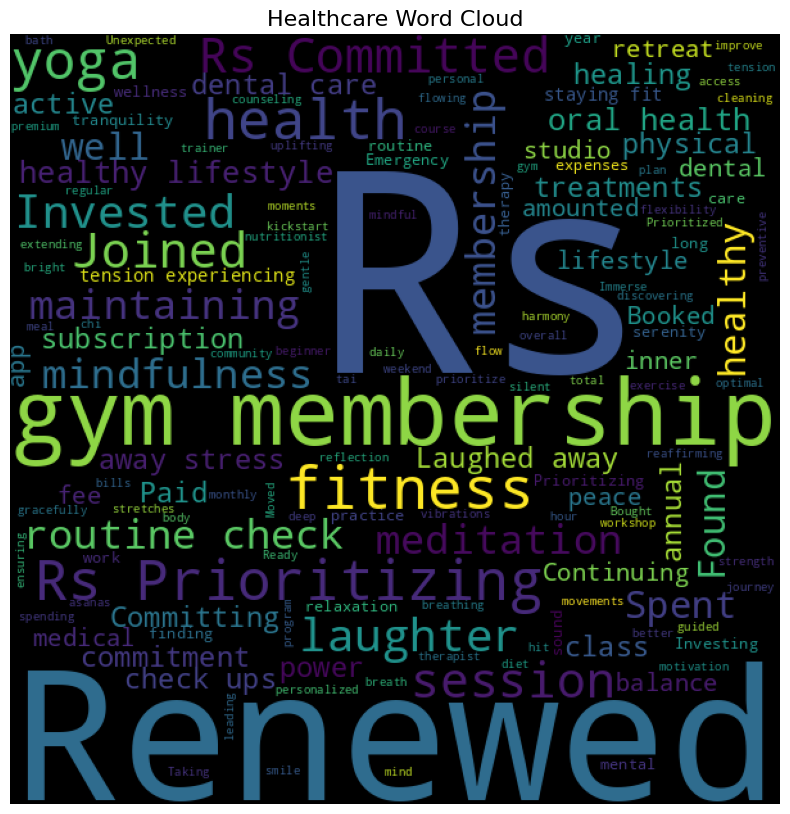

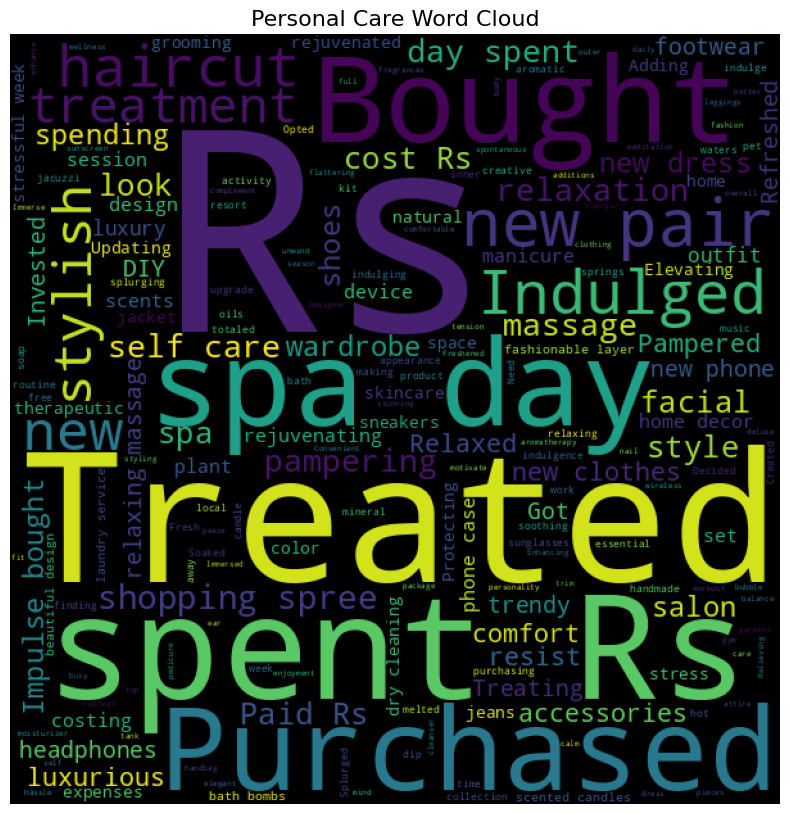

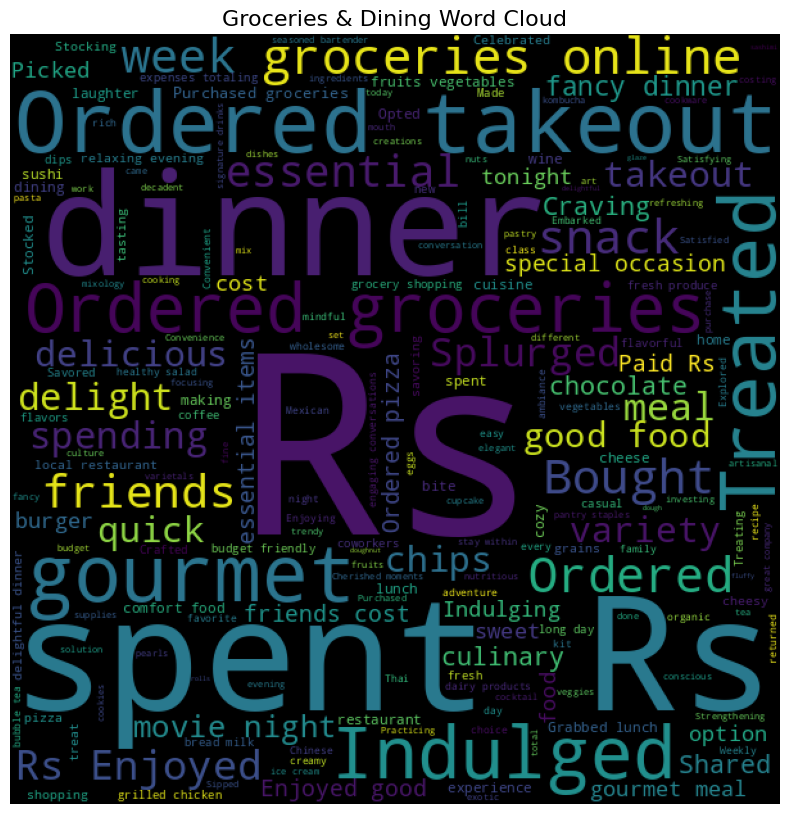

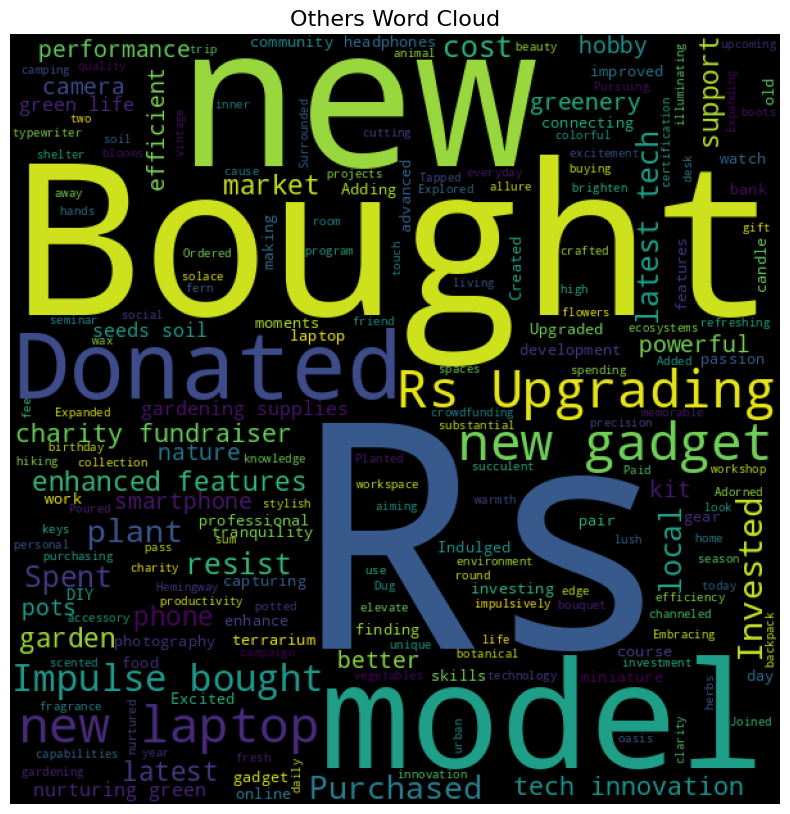

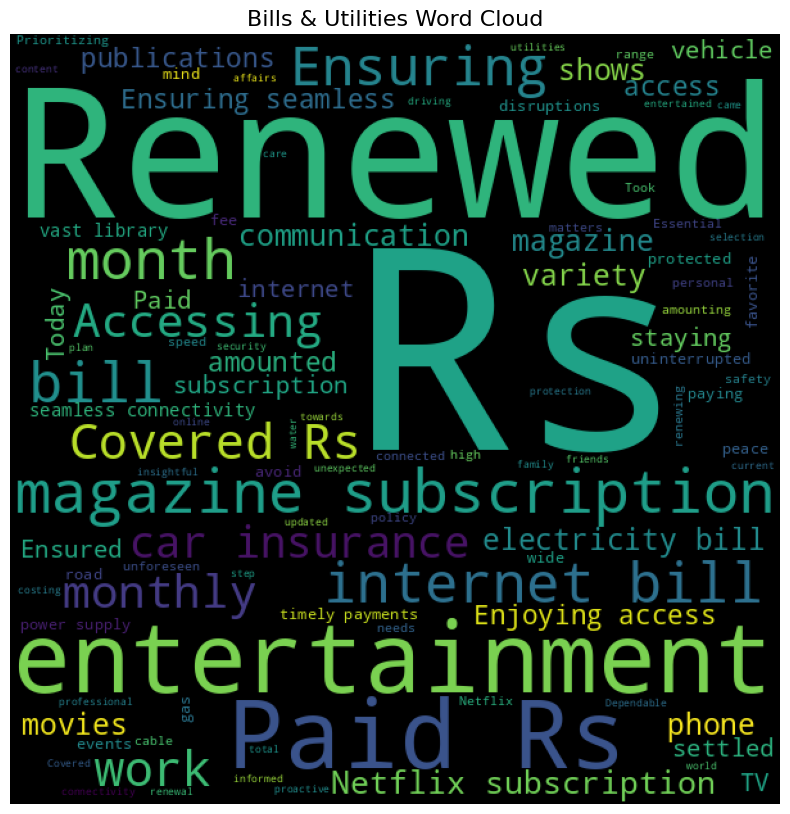

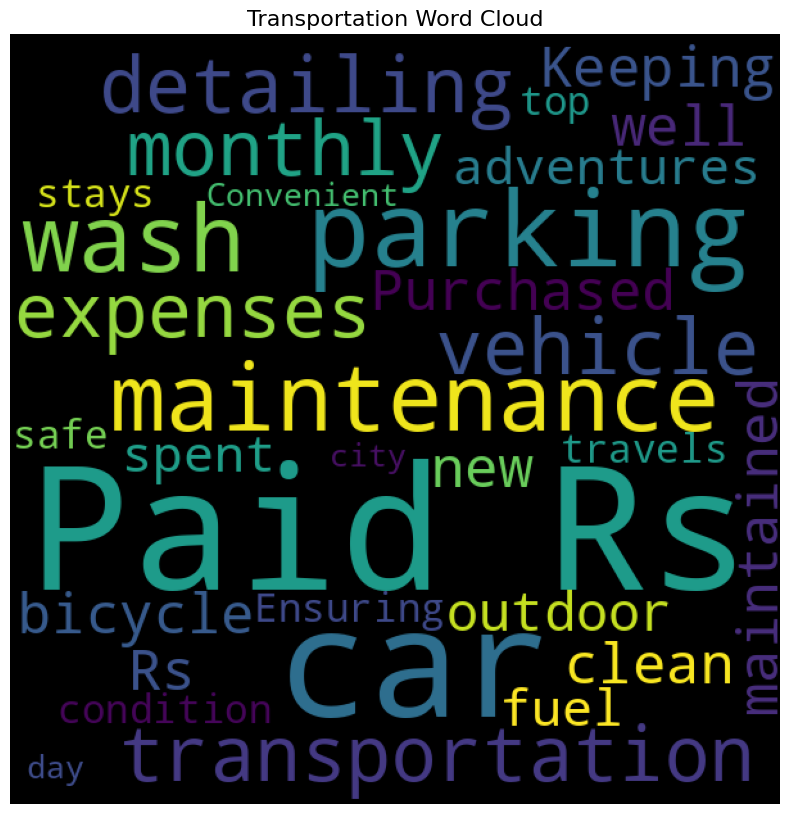

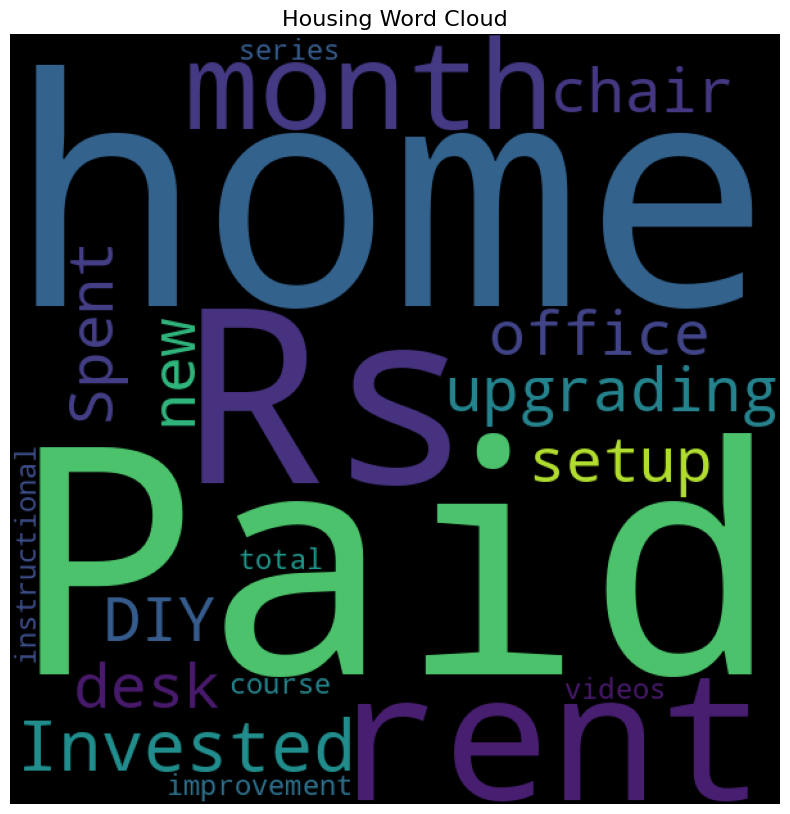

In [18]:
# Words cloud for each emotions
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");
emotions_list = train_data['Categorical_Emotion'].unique()
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in train_data.loc[train_data['Categorical_Emotion'] == emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

In [19]:
lb = LabelEncoder()
train_data['Categorical_Emotion'] = lb.fit_transform(train_data['Categorical_Emotion'])

In [20]:
train_data.head()

Comment  Categorical_Emotion  \
0        Treated myself to a movie night for Rs 500.                    1   
1  Invested Rs 3200 in cryptocurrency for potenti...                    2   
2  Planned a fun-filled day trip with family, spe...                    1   
3                Invested Rs 7980 in cryptocurrency.                    2   
4                     Invested Rs 5600 in a startup.                    2   

   length  
0      43  
1      57  
2     143  
3      35  
4      30

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [22]:
df = train_data.copy()

In [23]:
df.head()

Comment  Categorical_Emotion  \
0        Treated myself to a movie night for Rs 500.                    1   
1  Invested Rs 3200 in cryptocurrency for potenti...                    2   
2  Planned a fun-filled day trip with family, spe...                    1   
3                Invested Rs 7980 in cryptocurrency.                    2   
4                     Invested Rs 5600 in a startup.                    2   

   length  
0      43  
1      57  
2     143  
3      35  
4      30

In [24]:
from tqdm import tqdm
tqdm.pandas()
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

def clean_data(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]", " ",text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = [word.replace('rs', '') for word in text]
    return " ".join(text)

df['cleaned_comment']  = df['Comment'].progress_apply(clean_data)
# df['cleaned_comment']  = df['Comment'].apply(clean_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
100%|██████████| 872/872 [00:00<00:00, 6571.13it/s]


In [25]:
df.head()

Comment  Categorical_Emotion  \
0        Treated myself to a movie night for Rs 500.                    1   
1  Invested Rs 3200 in cryptocurrency for potenti...                    2   
2  Planned a fun-filled day trip with family, spe...                    1   
3                Invested Rs 7980 in cryptocurrency.                    2   
4                     Invested Rs 5600 in a startup.                    2   

   length                                    cleaned_comment  
0      43                                  treat movi night   
1      57                  invest  cryptocurr potenti return  
2     143  plan fun fill day trip famili spend  ticket ac...  
3      35                                 invest  cryptocurr  
4      30                                    invest  startup

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_comment'], df['Categorical_Emotion'], test_size = 0.2, random_state=42)


In [ ]:
train_texts, val_test_texts, train_psych_types, val_test_psych_types = \
    train_test_split(train_texts, train_psych_types , test_size=0.2, random_state=42)

In [28]:
tfidfvectorizer = TfidfVectorizer()
X_train_tfidf = tfidfvectorizer.fit_transform(X_train)
X_test_tfidf = tfidfvectorizer.transform(X_test)

In [29]:
X_train_tfidf.shape

(697, 891)

In [30]:
classifier={
    'MultinomialNB':MultinomialNB(),
    'LogisticRegression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Support Vector Machine': SVC(),
}

for name,clf in classifier.items():
    print(f"\n============{name}============")
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"======={accuracy_tfidf}============")
    print("Classification Report")
    print(classification_report(y_test, y_pred_tfidf))


============MultinomialNB============
=======0.8971428571428571============
Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.86      0.98      0.92        52
           2       1.00      0.94      0.97        16
           3       0.91      0.96      0.93        45
           4       0.88      0.70      0.78        10
           6       1.00      0.54      0.70        13
           7       0.84      0.95      0.89        22
           8       0.00      0.00      0.00         4

    accuracy                           0.90       175
   macro avg       0.80      0.76      0.77       175
weighted avg       0.88      0.90      0.88       175


============LogisticRegression============
=======0.9085714285714286============
Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.88      0.96    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


=======0.8685714285714285============
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.87      0.87        52
           2       0.88      0.94      0.91        16
           3       0.96      0.96      0.96        45
           4       0.86      0.60      0.71        10
           6       0.89      0.62      0.73        13
           7       0.70      0.95      0.81        22
           8       0.67      0.50      0.57         4

    accuracy                           0.87       175
   macro avg       0.84      0.79      0.81       175
weighted avg       0.88      0.87      0.87       175


============Support Vector Machine============
=======0.9257142857142857============
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.98      0.93        52
           2      

In [31]:
svm = SVC()
svm.fit(X_train_tfidf, y_train)
svm_y_pred = svm.predict(X_test_tfidf)

In [32]:
def predict_emotion(input_text):
    cleaned_text = clean_data(input_text)
    input_vectorizer = tfidfvectorizer.transform([cleaned_text])

    predicted_label = svm.predict(input_vectorizer)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label = np.max(svm.predict(input_vectorizer))

    return predicted_emotion, label

In [33]:
predict_emotion("Invested Rs 3890 in cryptocurrency.")

('Financial Services', 2)

In [36]:
import pickle
pickle.dump(svm, open("svm_regression.pkl","wb"))
pickle.dump(lb, open("label_encoder.pkl","wb"))
pickle.dump(tfidfvectorizer, open("tfidfvectorizer.pkl","wb"))